# Modelo de Aprendizaje no Superviasado
# Algoritmo de Clustering KMEANS y Agglomerative Clustering
## Dataset: Load Digits
## Fuente: sklearn https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
Índice<a name="indice"></a>
* [1 Prepocesado de datos](#1)
    * [1.1 Importación de librerías](#1_1)
    * [1.2 Carga del Dataset](#1_2)
* [2 Análisis Exploratorio de datos](#2)
    * [2.1 Estadísitcas descriptivas](#2_1)
* [3 Diseño de características](#3)
    * [3.1 Tratamiento de datos nulos](#3_1)
    * [3.2 Transformación de características](#3_2)
    * [3.3 Selección de características relevante](#3_3)
    * [3.4 Tratamiento de outliers](#3_4)
    * [3.5 Tratamiento de correlación](#3_5)
    * [3.6 Normalización](#3_6)
* [4 Método del codo](#4) 
* [5 K-Medias con parámetros por defecto](#5) 
* [6 K-Medias con parámetros modificados](#6)
* [7 Agglomerative Clustering con parámetros por defecto](#7) 
* [8 Agglomerative Clustering con parámetros por modificados](#8) 

Descripción de la fuente: La fuente contiene imágenes de números escritos a mano. Es un diccionario de datos con los siguientes campos:
* _data_: Matriz o dataframe de pandas con las imágenes. Hay 1797 imágenes y cada una de ellas se representa por array plano de 64 valores de 0 a 15    
* _target_: Variable objetivo. El nº representado por la imagen. Son números del 0 al 9      
* _frame_: Dataframe con las variables idependientes y la variable objetivo          
* _feature_names_: Nombre de las variables independientes   
* _target_names_: Nombre de las clases que se van a tratar       
* _images_: Matriz con las imágenes sin processar, representada en un matriz de 8x8
* _DESCR_: Descripción del dataset                 

# 1 PREPRECESADO DE DATOS <a name="1"></a>
[Índice](#indice)

## 1.1 Importación de librerías <a name="1_1"></a>
[Índice](#indice)

In [13]:
import pandas as pd;
import numpy as np

from sklearn.datasets import load_digits

import seaborn as sns;
import matplotlib.pyplot as plt;

from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_score

def metodoDelCodo(datos, k_min, k_max):
    from sklearn.model_selection import cross_validate
    from sklearn.cluster import KMeans
    import numpy as np
    # Calculo WSS (Within-Cluster-Sum of Squared Errors) en función del 
    # número de clústers k
    # Calculo WSS (Within-Cluster-Sum of Squared Errors) en función del 
    # número de clústers k
    wss = []
    for K in range(k_min, k_max):
        clf = KMeans(init="random", random_state=0, n_clusters=K)
        clf.fit(datos)
        resultados = cross_validate(clf, datos, cv=4)
        wss.append(np.mean(resultados["test_score"]) * -1)

    # Represento el método del codo
    plt.plot(np.arange(k_min, k_max), wss)
    plt.xlabel("K")
    plt.ylabel("WSS")
    plt.title("Método del codo para obtener el K óptimo")
    plt.show()



def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def pintarPorGrupoEstimado(df):
    # Pintar las imágenes por grupo estimado, df debe tener columna Grupo
    for j in range(0,10):
        # Pintar imágenes por grupo
        #Obtener muestras grupo j
        numeros = df[df['Grupo']==j]

        # Mostrar imágenes
        plt.subplots(figsize=(10,15))
        for i in range(0,len(numeros)):
            ax = plt.subplot(20,20,i+1)
            imagen = numeros.iloc[i:i+1,0:64].to_numpy()
            imagen = imagen.reshape(8, 8)
            ax.set_title(str(numeros.iloc[i:i+1,64:65].to_numpy()[0][0])+'/'+str(numeros.iloc[i:i+1,65:66].to_numpy()[0][0]))
            plt.imshow(imagen, cmap=plt.cm.gray)
            plt.axis('off')

def inforGrupo(real, estimado):
    print(f"--Grupo real {real}-Grupo estimado {estimado}--")
    print(f"Nº {real} reales:{len(dfCalculado[dfCalculado['target']==real])}")
    print(f"Nº {real} bien estimados:{len(dfCalculado[(dfCalculado['target']==real) & (dfCalculado['Grupo']==estimado)])}")
    print(f"{real} en otros grupos:\n{dfCalculado[(dfCalculado['target']==real) & (dfCalculado['Grupo']!=estimado)]['Grupo'].value_counts()}")
    print(f"Otros nºs en grupo {estimado}:\n{dfCalculado[(dfCalculado['target']!=real) & (dfCalculado['Grupo']==estimado)]['target'].value_counts()}")
    print("------------------------------------------------------------------\n")

## 1.2 Carga del dataset <a name="1_2"></a>
[Índice](#indice)

In [3]:
datos = load_digits(as_frame=True)
df=datos['data']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
datos['target']

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

# 2 PREPRECESADO DE DATOS <a name="2"></a>
[Índice](#indice)

## 2.1 Estadísticas descriptivas <a name="2_1"></a>
[Índice](#indice)

In [5]:
df.shape

(1797, 64)

# 3 DISEÑO DE CARACTERÍSTICAS <a name="3"></a>
[Índice](#indice)

## 3.1 Tratamiento de nulos <a name="3_1"></a>
[Índice](#indice)

## 3.2 Transformación de características <a name="3_2"></a>
[Índice](#indice)

In [12]:
# Transformaciones de tipo

In [14]:
# No es necesario hacer label encoding

In [15]:
# One hot encoding: Geography y Gender


In [16]:
# Seleccionamos las columnas generadas con OHE y las cambiamos a categóricas


## 3.3 Selección de características relevantes <a name="3_3"></a>
[Índice](#indice)

In [18]:
# Eliminar irrelevantes

## 3.4 Tratamiento de outliers <a name="3_4"></a>
[Índice](#indice)

## 3.5 Tratamiento de Correlación <a name="3_5"></a>
[Índice](#indice)

## 3.6 Normalización <a name="3_6"></a>
[Índice](#indice)

# 4 MÉTODO DEL CODO <a name="4"></a>
[Índice](#indice)

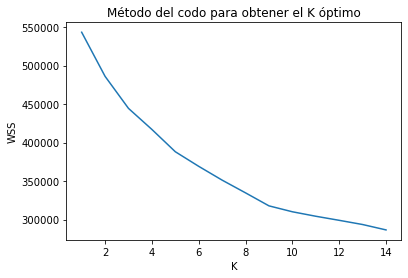

In [6]:
# Tenemos que obtener 10 grupos. Pero vamos a ver cuántos grupos detecta el método del codo
metodoDelCodo(df,1,15)
# Según el método del codo, podría haber unos 9 grupos. Es posible que haya dos nº que se confundan

# 5 KMEANS CON PARÁMETROS POR DEFECTO<a name="5"></a>
[Índice](#indice)

In [7]:
modeloKM = KMeans(n_clusters=10, random_state=0)
modeloKM.fit(df)

KMeans(n_clusters=10, random_state=0)

In [10]:
datos['target'].to_numpy()[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
modeloKM.labels_[0:20]

array([5, 7, 7, 1, 0, 3, 9, 4, 3, 3, 5, 6, 8, 1, 0, 2, 9, 4, 7, 3])

In [14]:
# Medir lo bien que lo ha hecho
silhouette_score(df,modeloKM.labels_)

0.18251916424600556

In [ ]:
# No es un buen resultado, ya que está lejos del 1. Debe haber grupos que estén mezclados

In [16]:
dfCalculado = pd.DataFrame(modeloKM.labels_,columns=['Grupo'])
dfCalculado = pd.concat([df,datos['target'],dfCalculado],axis=1)
dfCalculado

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,Grupo
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,5
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,7
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,7
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,1
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,3
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,5
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,7
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,3


In [18]:
# Mostrar Clasificación Real
dfCalculado['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

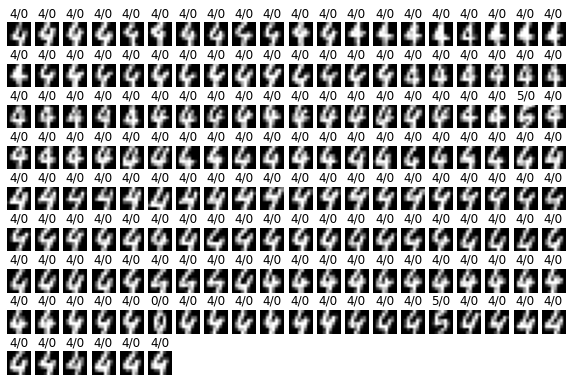

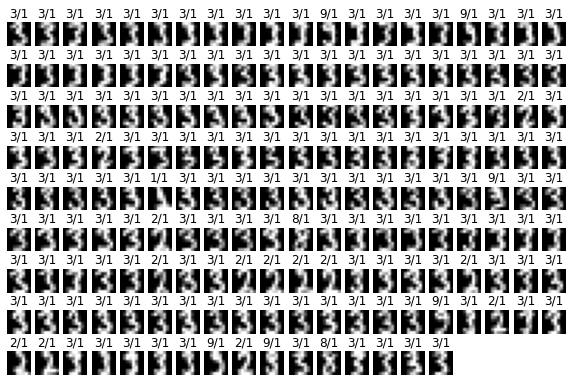

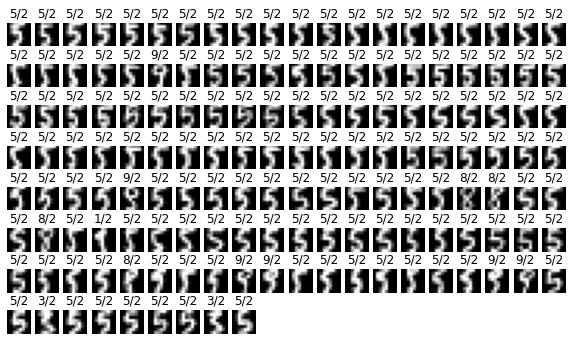

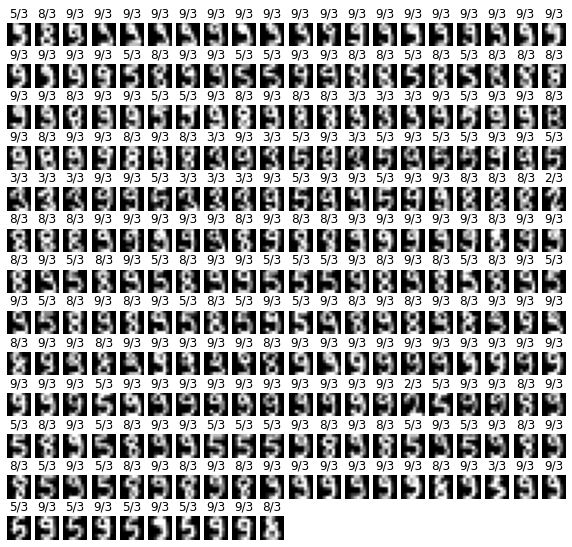

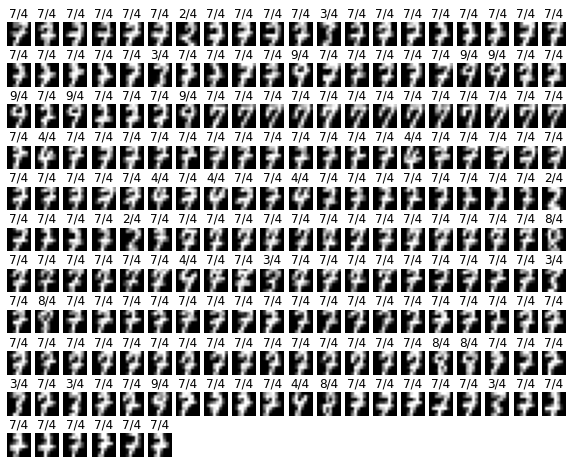

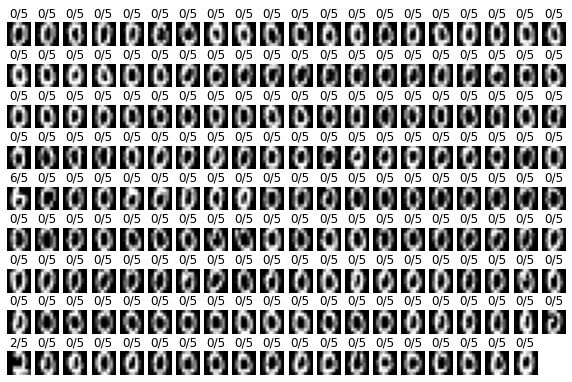

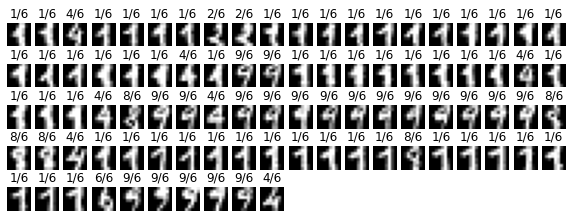

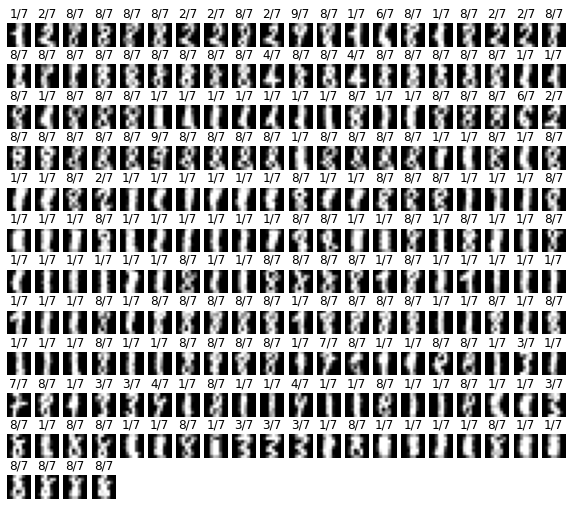

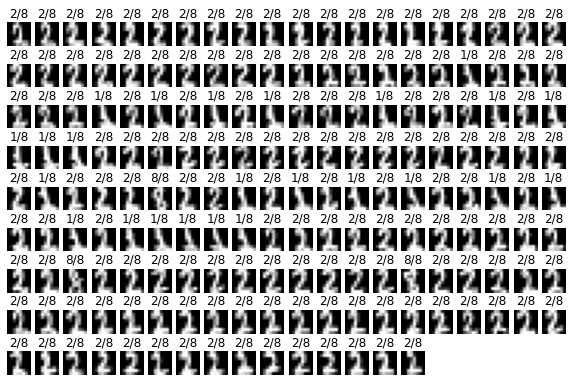

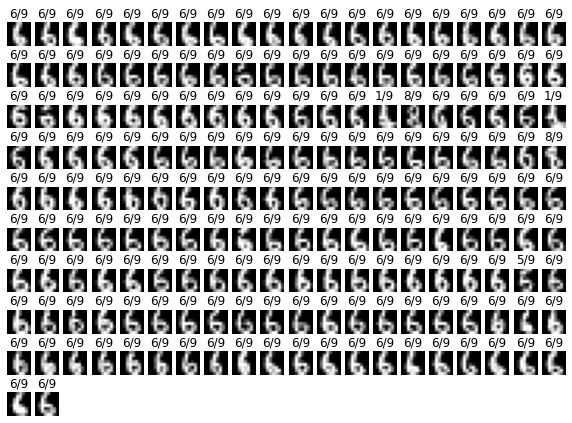

In [17]:
# mostrar qué nº han caído en cada grupo (Etiqueta: Grupo Real/Grupo Estimado)
pintarPorGrupoEstimado(dfCalculado)

In [19]:
# Grupo Estimado 0 equivale al Nº 4
inforGrupo(4,0)

--Grupo real 4-Grupo estimado 0--
Nº 4 reales:181
Nº 4 bien estimados:163
4 en otros grupos:
6    7
4    7
7    4
Name: Grupo, dtype: int64
Otros nºs en grupo 0:
5    2
0    1
Name: target, dtype: int64
------------------------------------------------------------------



In [20]:
inforGrupo(3,1)

--Grupo real 3-Grupo estimado 1--
Nº 3 reales:183
Nº 3 bien estimados:154
3 en otros grupos:
3    13
4     7
7     7
2     2
Name: Grupo, dtype: int64
Otros nºs en grupo 1:
2    13
9     6
8     2
1     1
Name: target, dtype: int64
------------------------------------------------------------------



In [21]:
inforGrupo(0,5)

--Grupo real 0-Grupo estimado 5--
Nº 0 reales:178
Nº 0 bien estimados:177
0 en otros grupos:
0    1
Name: Grupo, dtype: int64
Otros nºs en grupo 5:
6    1
2    1
Name: target, dtype: int64
------------------------------------------------------------------



# 6 KMEANS  CON PARÁMETROS MODIFICADOS<a name="6"></a>
[Índice](#indice)

# 7  AGLOMERATIVE CLUSTERING CON PARÁMETROS POR DEFECTO <a name="7"></a>
[Índice](#indice)

In [22]:
modeloAG = AgglomerativeClustering(n_clusters=10)
modeloAG.fit(df)

AgglomerativeClustering(n_clusters=10)

In [23]:
silhouette_score(df,modeloAG.labels_)

0.17849659940596496

In [ ]:
# El resultado es un poco peor que KMEANS

In [26]:
dfCalculado = pd.DataFrame(modeloAG.labels_,columns=['Grupo'])
dfCalculado = pd.concat([df,datos['target'],dfCalculado],axis=1)
dfCalculado

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,Grupo
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,7
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,9
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,4
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,1
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,1
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,7
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,4
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,1


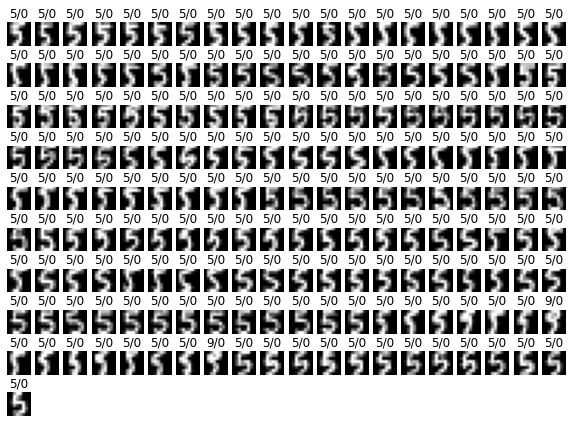

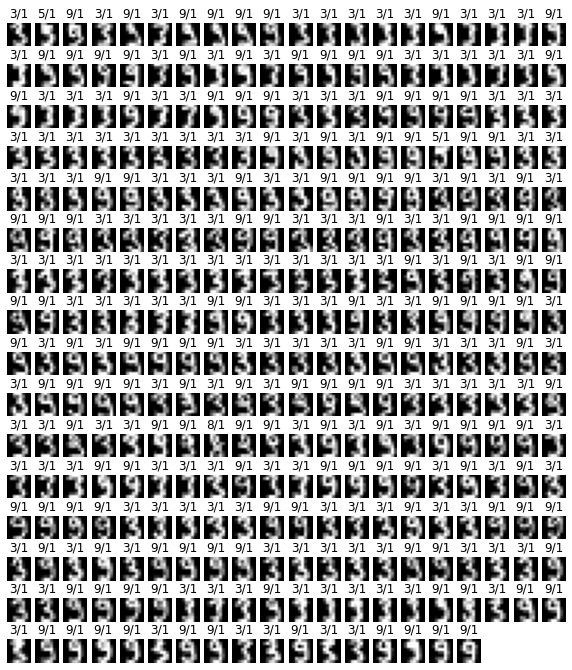

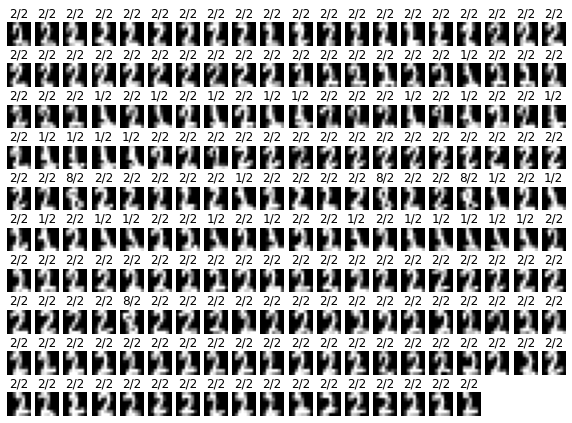

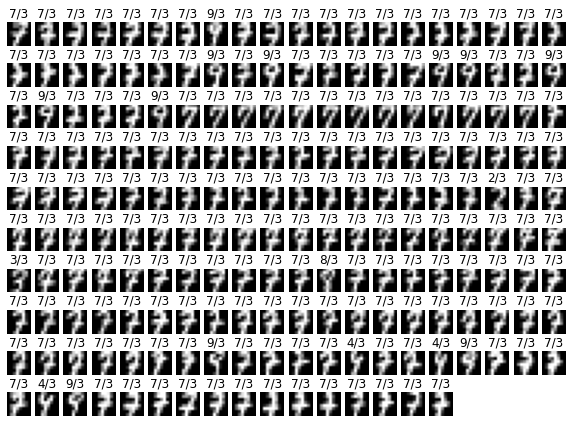

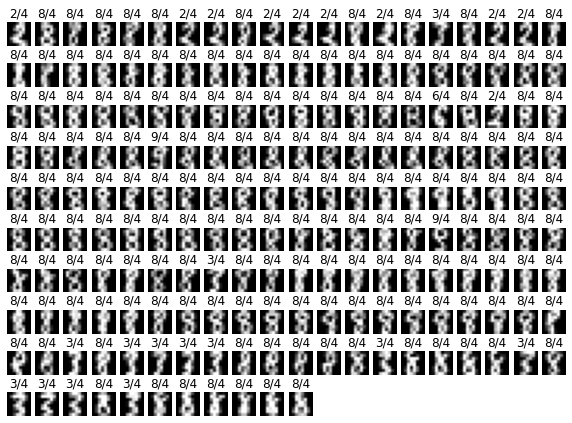

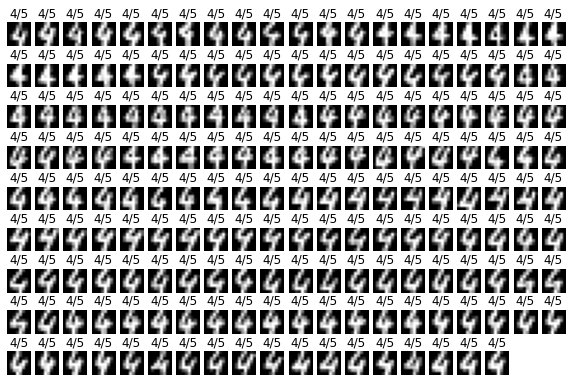

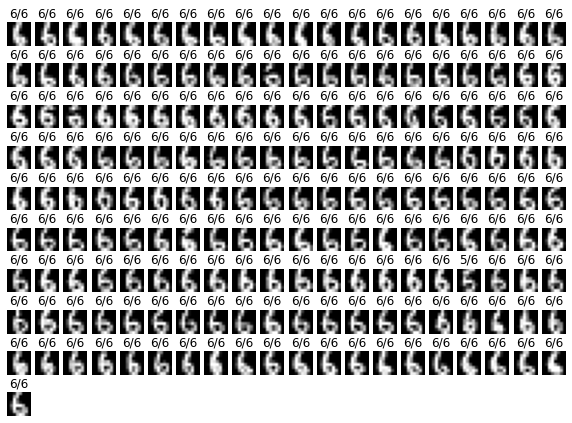

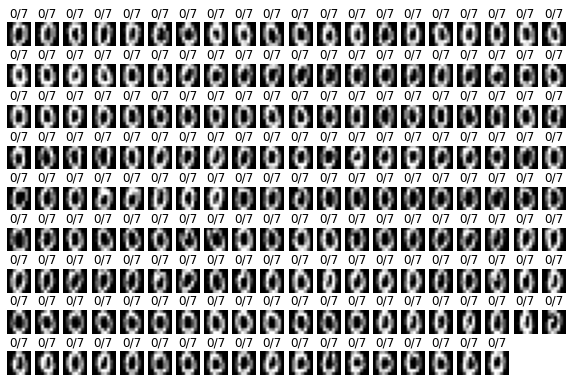

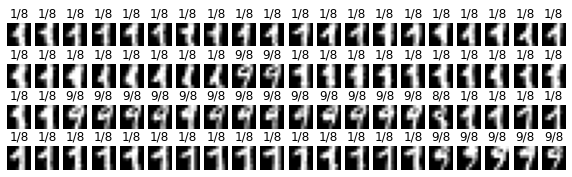

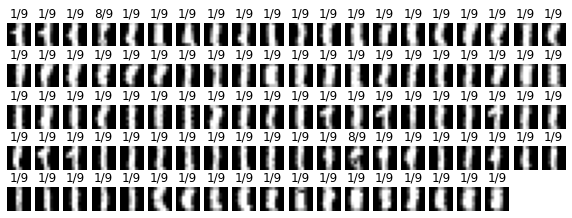

In [27]:
pintarPorGrupoEstimado(dfCalculado)

In [28]:
# Grupo Estimado 0 equivale al Nº 4
inforGrupo(4,5) # El 4 lo ha detectado mejor que kmeans

--Grupo real 4-Grupo estimado 5--
Nº 4 reales:181
Nº 4 bien estimados:178
4 en otros grupos:
3    3
Name: Grupo, dtype: int64
Otros nºs en grupo 5:
Series([], Name: target, dtype: int64)
------------------------------------------------------------------



In [29]:
inforGrupo(3,1)

--Grupo real 3-Grupo estimado 1--
Nº 3 reales:183
Nº 3 bien estimados:169
3 en otros grupos:
4    13
3     1
Name: Grupo, dtype: int64
Otros nºs en grupo 1:
9    145
5      2
8      1
Name: target, dtype: int64
------------------------------------------------------------------



In [30]:
inforGrupo(0,7)

--Grupo real 0-Grupo estimado 7--
Nº 0 reales:178
Nº 0 bien estimados:178
0 en otros grupos:
Series([], Name: Grupo, dtype: int64)
Otros nºs en grupo 7:
Series([], Name: target, dtype: int64)
------------------------------------------------------------------



In [ ]:
#La puntación silueta es peor que en Kmeans pero los tres números que hemos analizado los ha hecho mejor

# 8 AGLOMERATIVE CLUSTERING  CON PARÁMETROS MODIFICADOS<a name="8"></a>
[Índice](#indice)

In [44]:
modelo = AgglomerativeClustering(n_clusters=None,distance_threshold=270)
modelo.fit(df)
modelo.n_clusters_

10

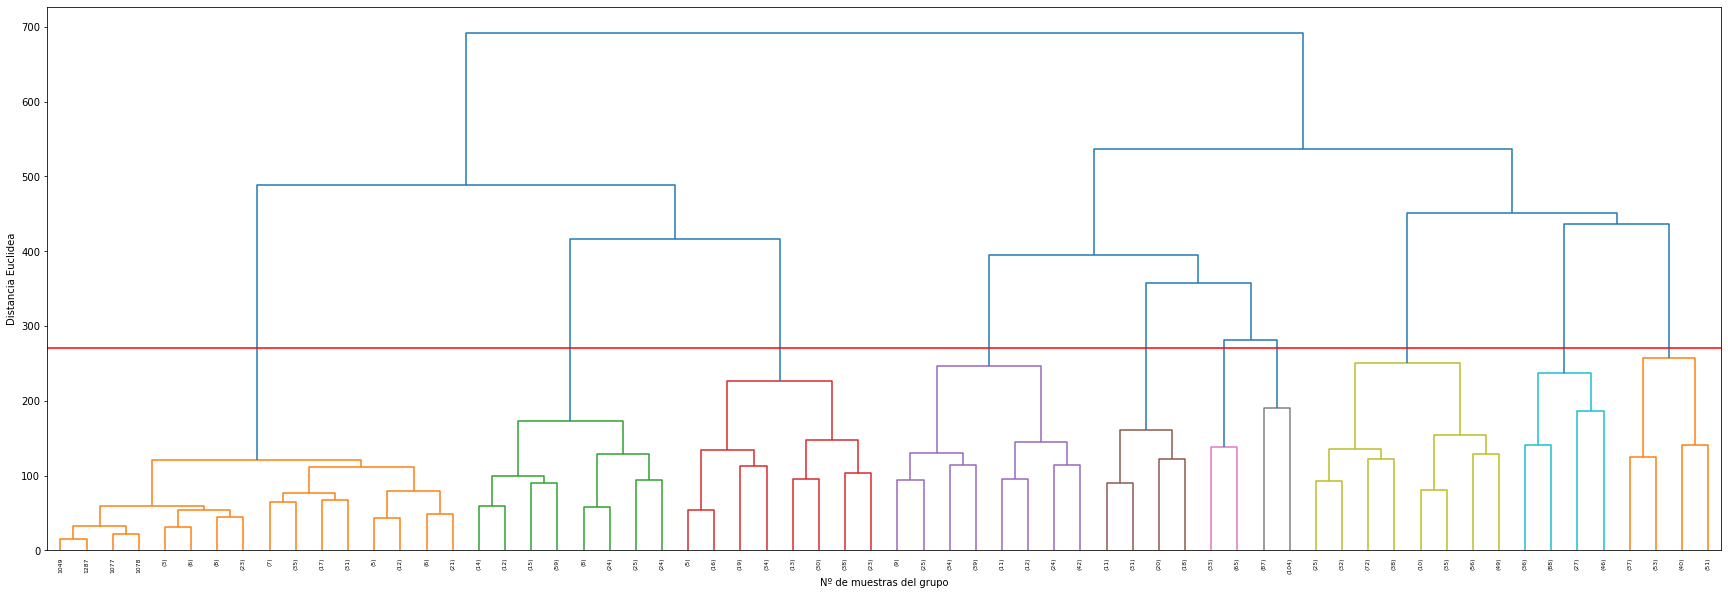

In [49]:
# Pintar el dendograma
plt.figure(figsize=(30,10))
plot_dendrogram(modelo, truncate_mode='level',p=5, color_threshold=270)
plt.xlabel('Nº de muestras del grupo')
plt.ylabel('Distancia Euclidea')
plt.hlines(xmin=0,xmax=2000,y=270, colors='red')
plt.show()